<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2023/blob/main/lecture5_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solution for the exercise**

**Performance:**

* Convolutional network with dropout regularization <br>
~91% - 92% after 20 epochs
* Augmentation added <br>
over 93% after 80 epochs


In [1]:
'''Trains a simple deep NN on the Fashion MNIST dataset.

M. Wolter
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam

from keras.utils.vis_utils import plot_model
from IPython.display import Image  


#Use data augmentation?
use_data_aug = True

batch_size = 128
num_classes = 10
if use_data_aug:
  epochs = 40
else:  
  epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train0, num_classes)
y_test = tf.keras.utils.to_categorical(y_test0, num_classes)




4422102/4422102 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


#**A fashion dictionary**

In [2]:

# a dict to help encode/decode the labels
FASHION_LABELS = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot',
}


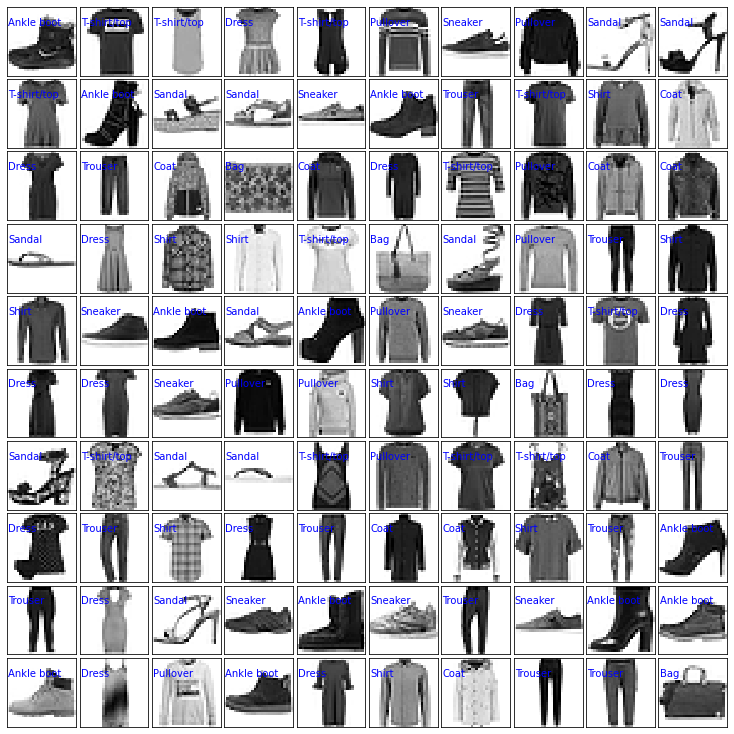

In [3]:
#visualize the fashion

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, FASHION_LABELS[y_train0[i]],size=10, color='blue')

In [4]:
# This is new as well

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

###**Here is the only place where we change something:**
we replace *Dense* layers by convolutional ones:

In [5]:
# Our old fully connected (dense) network
#model = Sequential()
#model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [6]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#Image('model_plot.png')

# **Compile and fit model (with or without augmentation)**

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# if data augmentation
if use_data_aug:
        print('Training mode with data augmentation...', flush=True)
        # use image augmentation to increase training images
        
        from keras.preprocessing.image import ImageDataGenerator

        # NOTE: our datasets have already been scaled 
        train_datagen = ImageDataGenerator(
            rotation_range=5,
            width_shift_range=0.05,
            height_shift_range=0.05,
            shear_range=0.15,
            zoom_range=(0.95, 1.05),
            horizontal_flip=False,
            vertical_flip=False, 
            fill_mode='constant',
            cval=0)

        history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))



else:

        history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Training mode with data augmentation...
Epoch 1/40
469/469 [==============================] - 33s 45ms/step - loss: 0.7665 - accuracy: 0.7126 - val_loss: 0.4546 - val_accuracy: 0.8250
Epoch 2/40
469/469 [==============================] - 20s 43ms/step - loss: 0.4954 - accuracy: 0.8147 - val_loss: 0.3578 - val_accuracy: 0.8686
Epoch 3/40
469/469 [==============================] - 21s 44ms/step - loss: 0.4251 - accuracy: 0.8448 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 4/40
469/469 [==============================] - 21s 44ms/step - loss: 0.3818 - accuracy: 0.8614 - val_loss: 0.2999 - val_accuracy: 0.8879
Epoch 5/40
469/469 [==============================] - 21s 45ms/step - loss: 0.3568 - accuracy: 0.8688 - val_loss: 0.2873 - val_accuracy: 0.8954
Epoch 6/40
469/469 [==============================] - 20s 43ms/step - loss: 0.3409 - accuracy: 0.8783 - val_loss: 0.2881 - val_accuracy: 0.8961
Epoch 7/40
469/469 [==============================] - 21s 45ms/step - loss: 0.3290 - accuracy: 0

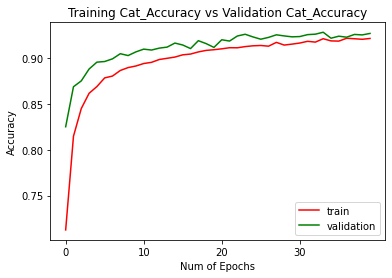

In [8]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])




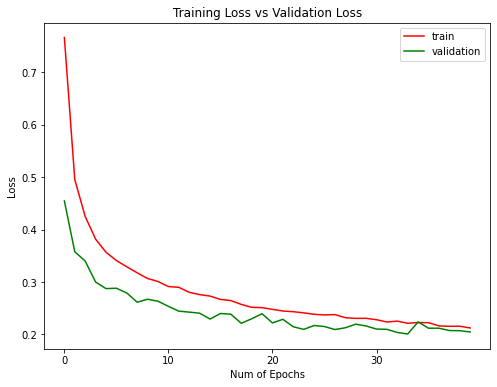

In [9]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()


In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20462927222251892
Test accuracy: 0.9266999959945679


In [11]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 94.71% , Test: 92.67% 


In [12]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



313/313 - 1s - 675ms/epoch - 2ms/step
[[902   0   7  10   2   1  74   0   4   0]
 [  0 986   1  10   1   0   0   0   2   0]
 [ 18   1 884   7  49   0  40   0   1   0]
 [ 14   3   5 920  30   0  26   0   2   0]
 [  0   0  25  18 918   0  39   0   0   0]
 [  0   0   0   0   0 991   0   6   0   3]
 [116   0  41  18  79   0 741   0   5   0]
 [  0   0   0   0   0  12   0 974   0  14]
 [  5   2   1   1   0   1   2   0 988   0]
 [  0   0   0   0   0   7   0  30   0 963]]


In [13]:
'''
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()
'''

'\n# Visualizing of confusion matrix\nimport seaborn as sn\nimport pandas  as pd\n\n\ndf_cm = pd.DataFrame(cm, range(10),range(10))\n#                     range(num_classes),\n#                  range(num_classes))\n#plt.figure(figsize = (10,7))\nplt.figure(2,figsize = (15,15) )\nsn.set(font_scale=1.4) #for label size\nsn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size\nplt.show()\n'

313/313 [==============================] - 1s 2ms/step


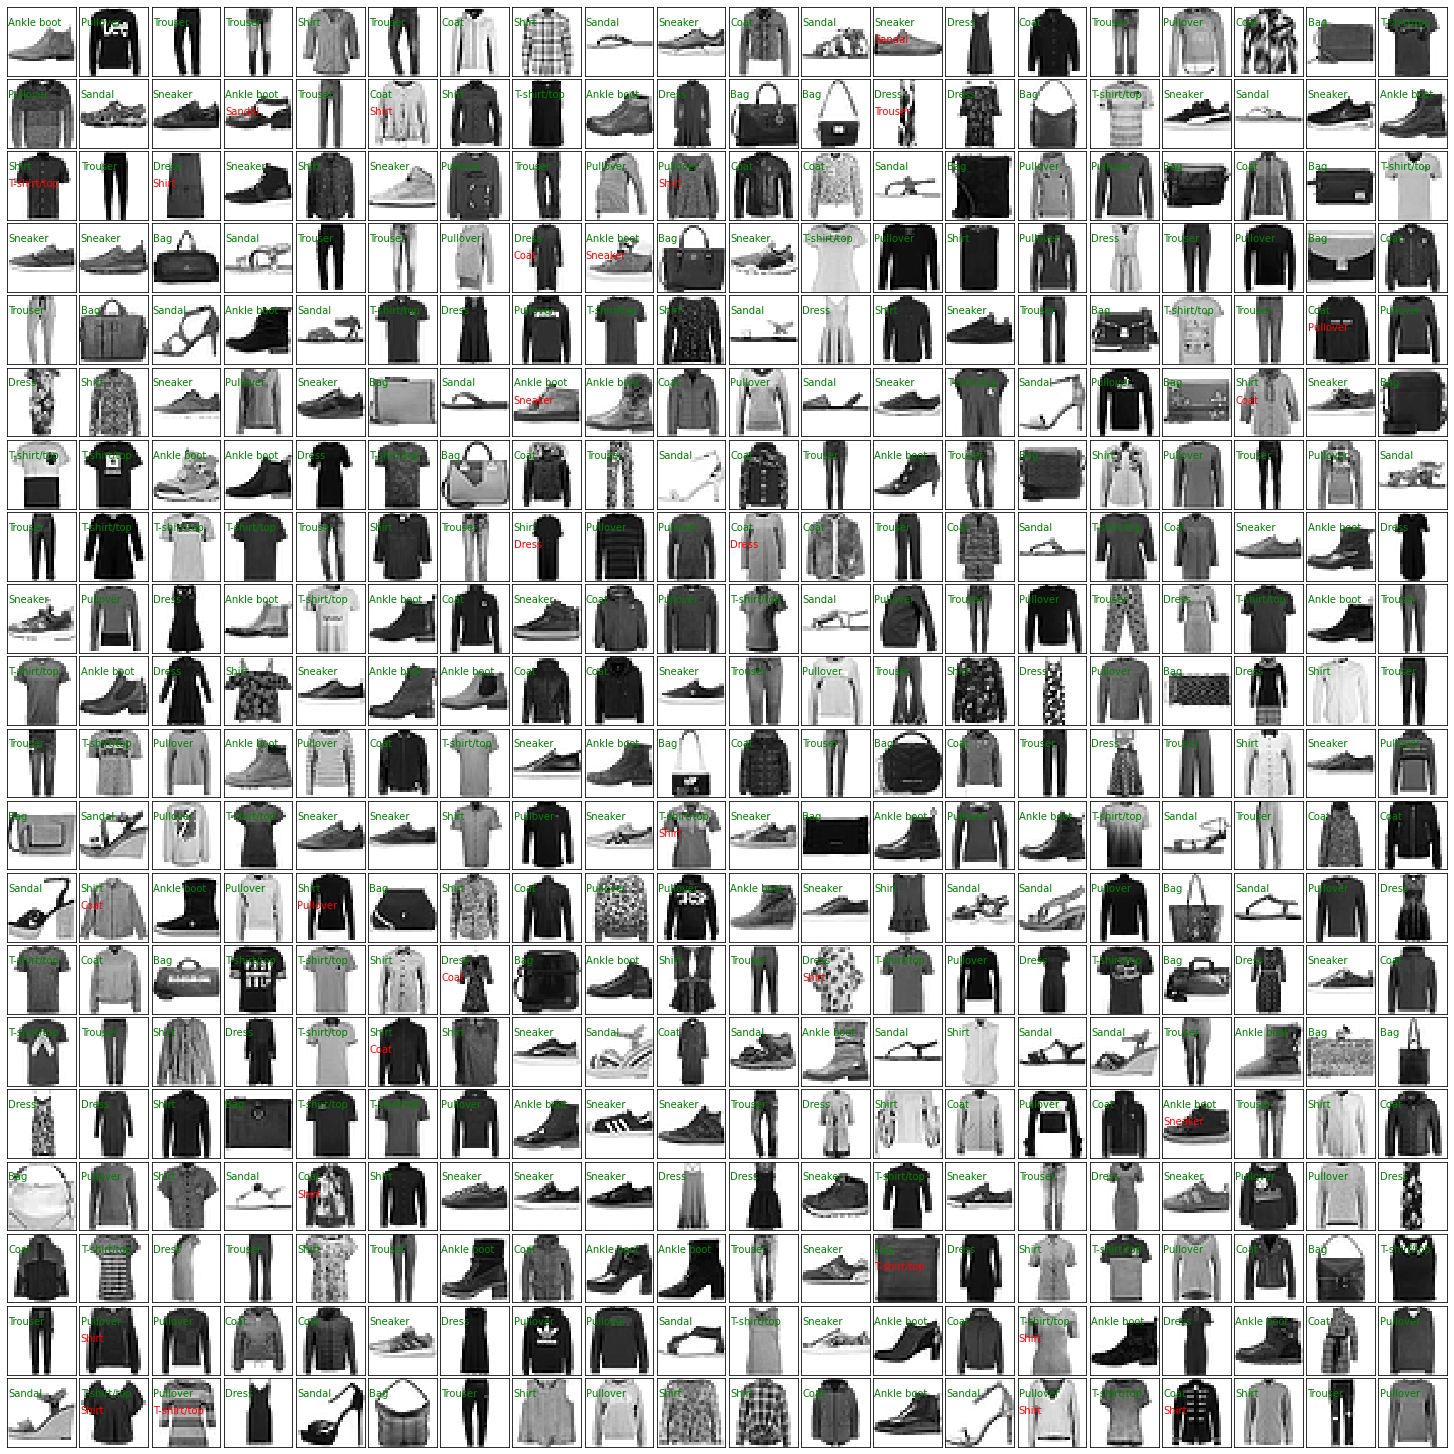

In [14]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, FASHION_LABELS[expected[i]], size=10, color='green')
    else:
        ax.text(0, 7, FASHION_LABELS[expected[i]], size=10, color='green')
        ax.text(0, 14, FASHION_LABELS[np.argmax(predicted[i])], size=10, color='red')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


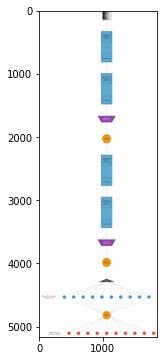

In [18]:

# Creates the graph.png file

! pip3 install keras-visualizer
from keras_visualizer import visualizer  

#create the graph.png image
visualizer(model=model, view=False, file_format='png', file_name='graph')

#show the graph
import matplotlib.image as mpimg
img = mpimg.imread('graph.png')
imgplot = plt.imshow(img,)
plt.show()
